In [1]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer.save_pretrained('bert-tokenizer-pretrained')

In [2]:
# from transformers import BertModel

# tokenizer = BertModel.from_pretrained('bert-base-uncased')
# tokenizer.save_pretrained('bert-model-pretrained')

In [4]:
import torch
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Parameter, Linear


In [33]:
def new_parameter(*size):
    out = Parameter(torch.FloatTensor(*size))
    torch.nn.init.xavier_normal_(out)
    return out

In [46]:
attention_size = 200
x_in = torch.tensor([x for x in range(200)]).repeat(36,1).unsqueeze(0).float()
reduction_dim = -2

attention = new_parameter(attention_size, 1)
print("self.attention .shape ", attention.shape)
print("x_in.shape ", x_in.shape)
print("torch.matmul(x_in, self.attention).shape ", torch.matmul(x_in, attention).shape)
attn_score = torch.matmul(x_in, attention).squeeze()
print("attn_score.shape ", attn_score.shape)
# add one dimension at the end and get a distribution out of scores
attn_distrib = F.softmax(attn_score.squeeze(), dim=-1).unsqueeze(-1)
print("attn_distrib.shape ", attn_distrib.shape)
scored_x = x_in * attn_distrib
print("scored_x.shape ", scored_x.shape)
weighted_sum = torch.sum(scored_x, dim=reduction_dim)
print("weighted_sum.shape ", weighted_sum.shape)


self.attention .shape  torch.Size([200, 1])
x_in.shape  torch.Size([1, 36, 200])
torch.matmul(x_in, self.attention).shape  torch.Size([1, 36, 1])
attn_score.shape  torch.Size([36])
attn_distrib.shape  torch.Size([36, 1])
scored_x.shape  torch.Size([1, 36, 200])
weighted_sum.shape  torch.Size([1, 200])


In [62]:
attention_size = 5
x_in = torch.tensor([x for x in range(1,6)]).repeat(3,1).unsqueeze(0).float()
reduction_dim = -2

attention = torch.tensor([5,7,13,2,1]).reshape(-1,1).float()
print("self.attention .shape ", attention)
print("x_in.shape ", x_in)
print("torch.matmul(x_in, self.attention).shape ", torch.matmul(x_in, attention))
attn_score = torch.matmul(x_in, attention).squeeze()
print("attn_score.shape ", attn_score)
# add one dimension at the end and get a distribution out of scores
attn_distrib = F.softmax(attn_score.squeeze(), dim=-1).unsqueeze(-1)
print("attn_distrib.shape ", attn_distrib)
scored_x = x_in * attn_distrib
print("scored_x.shape ", scored_x)
weighted_sum = torch.sum(scored_x, dim=reduction_dim)
print("weighted_sum.shape ", weighted_sum)

self.attention .shape  tensor([[ 5.],
        [ 7.],
        [13.],
        [ 2.],
        [ 1.]])
x_in.shape  tensor([[[1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.]]])
torch.matmul(x_in, self.attention).shape  tensor([[[71.],
         [71.],
         [71.]]])
attn_score.shape  tensor([71., 71., 71.])
attn_distrib.shape  tensor([[0.3333],
        [0.3333],
        [0.3333]])
scored_x.shape  tensor([[[0.3333, 0.6667, 1.0000, 1.3333, 1.6667],
         [0.3333, 0.6667, 1.0000, 1.3333, 1.6667],
         [0.3333, 0.6667, 1.0000, 1.3333, 1.6667]]])
weighted_sum.shape  tensor([[1., 2., 3., 4., 5.]])


## Visualize results

In [63]:
import json
import pandas as pd


In [73]:
with open("./output_pretrained_test1.txt") as f:
    file = f.readlines()
file

['{"citingPaperId": "2c6797dab4c118cb73197f65ba39dacc99ac743d", "citedPaperId": "95c37bc99982d33873fd141ee00857160fd717a0", "prediction": "method", "citation_text": ["Chapel", ",", "as", "well", "as", "X10", "[", "@@UNKNOWN@@", "]", ",", "UPC", "[", "@@UNKNOWN@@", "]", ",", "CoArray", "Fortran", "[", "@@UNKNOWN@@", "]", ",", "and", "Titanium", "[", "@@UNKNOWN@@", "]", ",", "rely", "on", "the", "Partitioned", "Global", "Address", "Space", "(", "PGAS", ")", "memory", "model", ",", "which", "enables", "The", "work", "has", "been", "performed", "under", "the", "HPC", "-", "EUROPA2", "project", "(", "project", "number", ":", "@@UNKNOWN@@", ")", "with", "the", "support", "of", "the", "European", "Commission", "-", "Capacities", "Area", "-", "Research", "Infrastructures", "."], "attention_dist": [0.0014826080296188593, 0.003394931089133024, 0.007108890451490879, 0.0026933702174574137, 0.0010853629792109132, 0.0009892276721075177, 0.0012920171720907092, 0.0006870599463582039, 0.000989101245068

In [98]:
ls_file = [json.loads(x) for x in file]
pd_file = pd.DataFrame(ls_file)

In [129]:
i = 2
pd_file['citation_text'].iloc[i]
df = pd.DataFrame({'citation_text': pd_file['citation_text'].iloc[i], 'attention_dist': pd_file['attention_dist'].iloc[i]})
df.set_index("citation_text", inplace=True)
df

,attention_dist
citation_text,
Several,0.006984
instruments,0.004360
that,0.003273
more,0.005351
specifically,0.005837
address,0.004224
patient,0.003288
-,0.004303
reported,0.002347


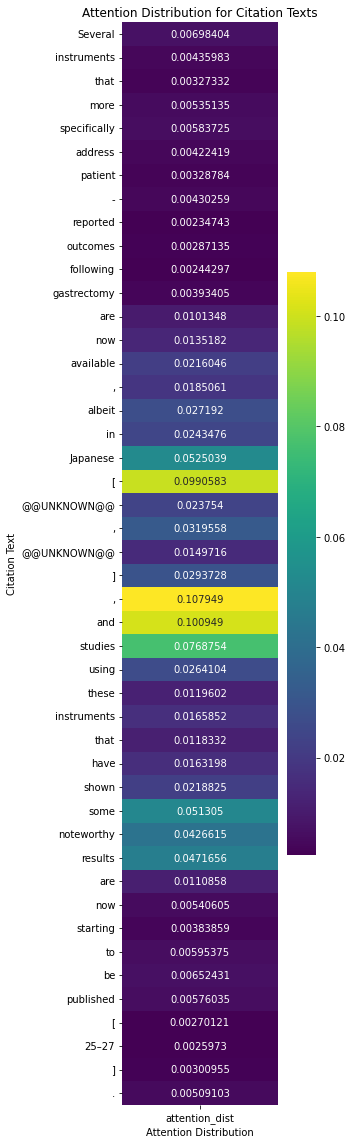

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns


# # Plot using Seaborn barplot
plt.figure(figsize=(5, 16))
sns.heatmap(df, annot=True, fmt="g", cmap='viridis')
plt.title('Attention Distribution for Citation Texts')
plt.xlabel('Attention Distribution')
plt.ylabel('Citation Text')
plt.tight_layout()
plt.show()